In [1]:
import h5py
import numpy as np
import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loc_value = 4

In [3]:
#sim_data = sorted(glob.glob('../simulated_data/melanomaS2_sim*'))

In [4]:
loom_file_path =  '../simulated/dropout_present/melanomaS2_sim_loc'+str(loc_value)+'.loom'

In [5]:
dim_red_results_path = sorted(glob.glob('../analysis/dropout_present/*/melanomaS2_sim_loc'+str(loc_value)+'.csv'))

In [6]:
cluster_results_path = sorted(glob.glob('../analysis/dropout_present/*/clusters/melanomaS2_sim_loc'+str(loc_value)+'clusters.csv'))

In [7]:
h5f = h5py.File(loom_file_path, 'r')

In [8]:
data = h5f['matrix'][:]

In [9]:
data.shape

(2495, 1000)

In [10]:
x = h5f['col_attrs']

In [11]:
cell_groups = x['cell_groups'][:]

In [12]:
h5f.close()

In [13]:
vfunc1 = np.vectorize(lambda t: t.decode('UTF-8'))
cell_groups = vfunc1(cell_groups)

In [14]:
vfunc2 = np.vectorize(lambda t: int(t[-1:]))
cell_groups = vfunc2(cell_groups)

### Dimensionality reduction results

In [15]:
dim_results = []
for d in dim_red_results_path:
    dim_results.append(np.genfromtxt(d, delimiter=','))

In [16]:
dim_results[0].shape

(2495, 2)

### Cluster results

In [17]:
dim_red_results_path[2].split('/')[3]

'pca'

In [18]:
cluster_results = []
for c in cluster_results_path:
    cluster_results.append(np.genfromtxt(c, delimiter=',', dtype=np.int64))   

In [19]:
i = 0
for cr in cluster_results:
    print (cluster_results_path[i])
    print ('nmi')
    i = i + 1
    print(normalized_mutual_info_score(cell_groups, cr))

../analysis/dropout_present/block_zifa/clusters/melanomaS2_sim_loc4clusters.csv
nmi
1.0
../analysis/dropout_present/factor_analysis/clusters/melanomaS2_sim_loc4clusters.csv
nmi
0.9948861621893837
../analysis/dropout_present/pca/clusters/melanomaS2_sim_loc4clusters.csv
nmi
0.9038601573355429
../analysis/dropout_present/simlr/clusters/melanomaS2_sim_loc4clusters.csv
nmi
1.0000000000000002
../analysis/dropout_present/tsne/clusters/melanomaS2_sim_loc4clusters.csv
nmi
0.7675607685251968


In [20]:
def display_projection (ids):
    colors = ['red', 'blue', 'green']
    cluster_ids = sorted(list(set(ids)))
    plt.figure(figsize=[30, 10])

    plt.subplot(151)
    for id in cluster_ids:
        plt.scatter(dim_results[2][[i==id for i in ids],0], dim_results[2][[i==id for i in ids],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[2].split('/')[3])
        # title(titles[method])

    plt.subplot(152)
    for id in cluster_ids:
        plt.scatter(dim_results[1][[i==id for i in ids],0], dim_results[1][[i==id for i in ids],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[1].split('/')[3])
        # title(titles[method])

    plt.subplot(153)
    for id in cluster_ids:
        plt.scatter(dim_results[0][[i==id for i in ids],0], dim_results[0][[i==id for i in ids],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[0].split('/')[3])
        
    plt.subplot(154)
    for id in cluster_ids:
        plt.scatter(dim_results[3][[i==id for i in ids],0], dim_results[3][[i==id for i in ids],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[3].split('/')[3])
        
    plt.subplot(155)
    for id in cluster_ids:
        plt.scatter(dim_results[4][[i==id for i in ids],0], dim_results[4][[i==id for i in ids],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[4].split('/')[3])
        
def display_clustered_projection ():
    colors = ['red', 'blue', 'green']
    cluster_ids = sorted(list(set(cluster_results[0])))
    plt.figure(figsize=[30, 10])

    plt.subplot(151)
    for id in cluster_ids:
        plt.scatter(dim_results[2][[i==id for i in cluster_results[2]],0], dim_results[2][[i==id for i in cluster_results[2]],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[2].split('/')[3])
        # title(titles[method])

    plt.subplot(152)
    for id in cluster_ids:
        plt.scatter(dim_results[1][[i==id for i in cluster_results[1]],0], dim_results[1][[i==id for i in cluster_results[1]],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[1].split('/')[3])
        # title(titles[method])

    plt.subplot(153)
    for id in cluster_ids:
        plt.scatter(dim_results[0][[i==id for i in cluster_results[0]],0], dim_results[0][[i==id for i in cluster_results[0]],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[0].split('/')[3])
        
    plt.subplot(154)
    for id in cluster_ids:
        plt.scatter(dim_results[3][[i==id for i in cluster_results[3]],0], dim_results[3][[i==id for i in cluster_results[3]],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[3].split('/')[3])
        
    plt.subplot(155)
    for id in cluster_ids:
        plt.scatter(dim_results[4][[i==id for i in cluster_results[4]],0], dim_results[4][[i==id for i in cluster_results[4]],1], color = colors[id - 1], s = 4)
        plt.title(dim_red_results_path[4].split('/')[3])

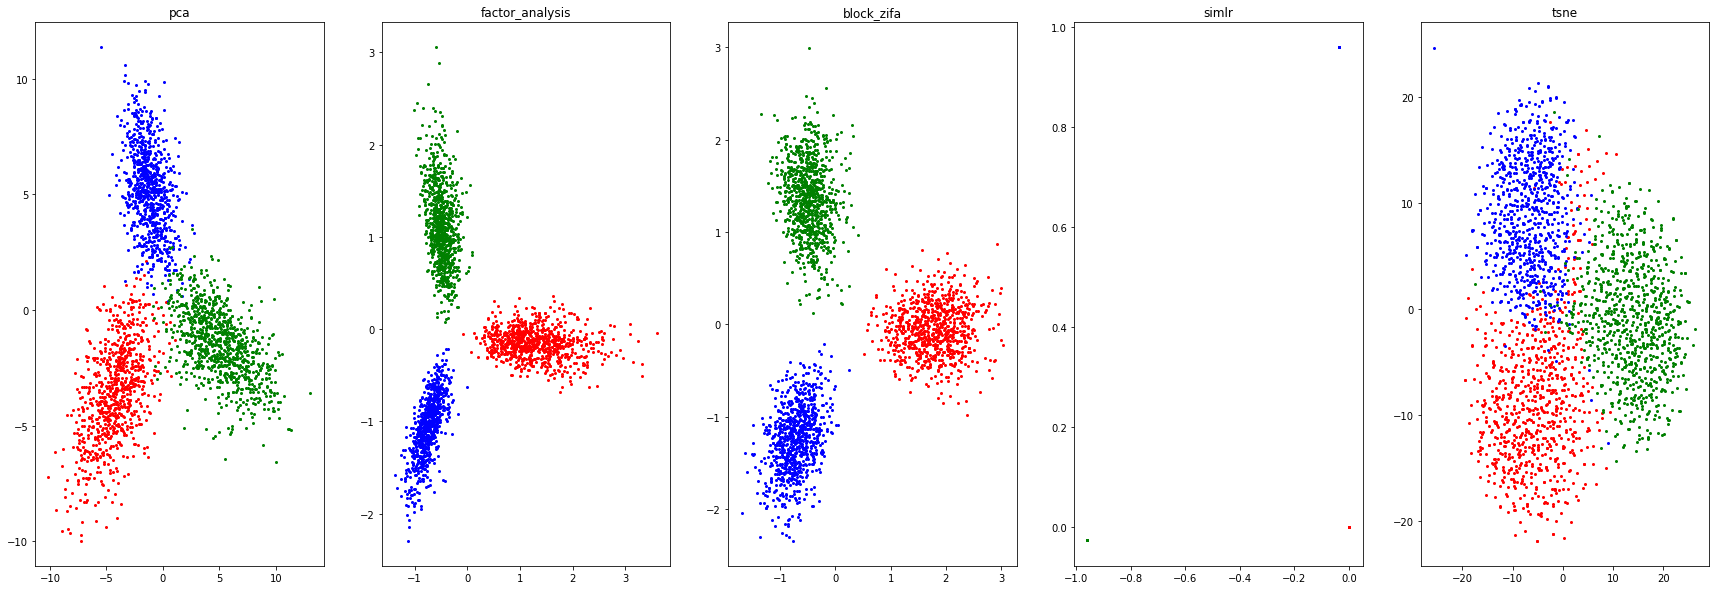

In [21]:
display_projection(ids=cell_groups)

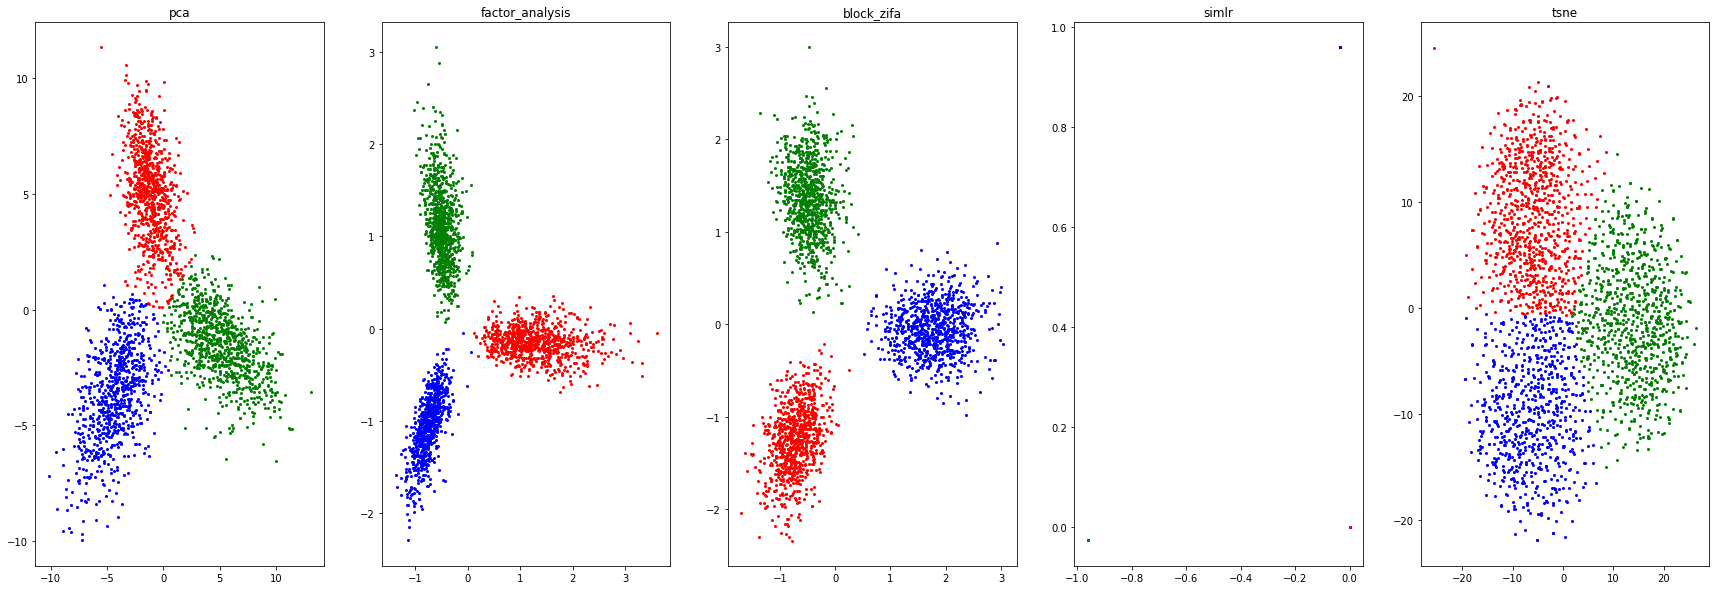

In [22]:
display_clustered_projection()